# Choosing a Plot for Discrete Data

Choosing a Plot for Discrete Data

If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.

The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data. Your readers may not know that values on bin edges end up in the bin to their right, so this can help remove potential confusion when they interpret the plot. Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges _on_ the values in the left subplot, and bin edges in between values in the right subplot.


~~~python
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

~~~

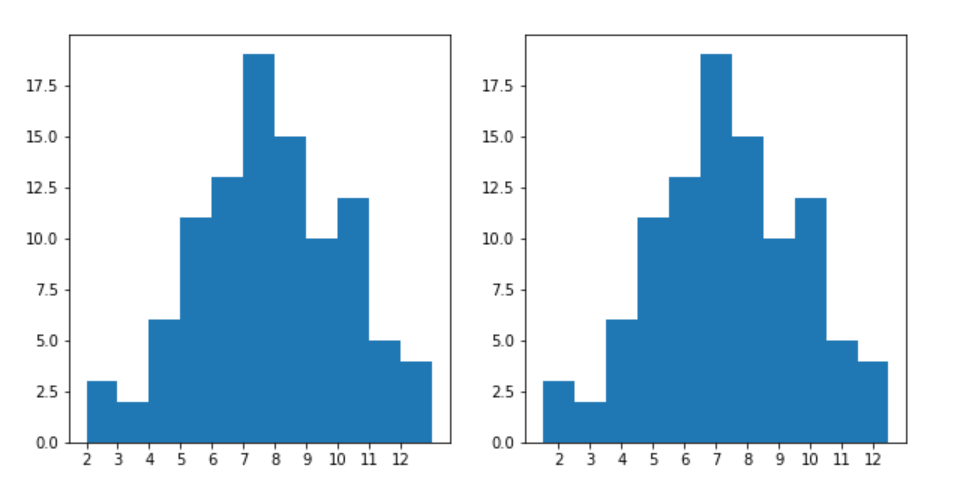

In [59]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [60]:
dice_rolls=np.random.randint(2,13,100)

In [61]:
dice_rolls.min()

2

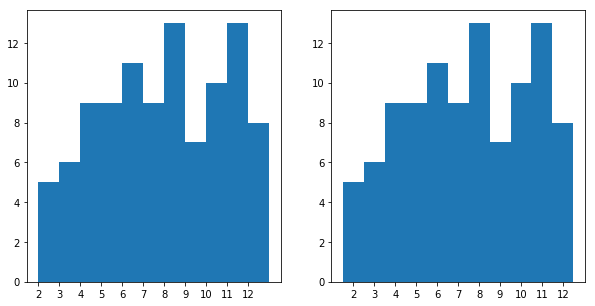

In [62]:
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges1 = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(dice_rolls, bins = bin_edges1)
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges2 = np.arange(1.5, 12.5+1, 1)
plt.hist(dice_rolls, bins = bin_edges2)
plt.xticks(np.arange(2, 12+1, 1));

In [63]:
bin_edges1

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

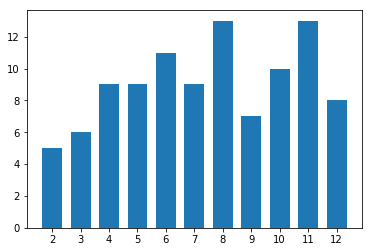

In [64]:
plt.figure()
bin_edges= np.arange(1.5,12.5+1,1)
plt.hist(dice_rolls,bins=bin_edges,rwidth=0.7);
plt.xticks(np.arange(2,12+1,1));

With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception

For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. 

As another caution, it might be tempting to use seaborn's **countplot** function to plot the distribution of a discrete numeric variable as bars Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, **countplot** would only plot four bars, with the bars for 2 and 4 right next to one another.) Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.